# ASPECT

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Class 0: 10665
Class 1: 6478
Class 2: 4503


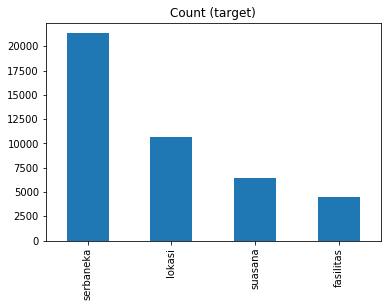

In [0]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('/content/drive/My Drive/PENDADARAN/49000_DATA_NEWEST_.csv')
target_count_aspect = df_train.labeled_Stem_Neg.value_counts()

print('Class 0:', target_count_aspect["lokasi"])
print('Class 1:', target_count_aspect["suasana"])
print('Class 2:', target_count_aspect["fasilitas"])

target_count_aspect.plot(kind='bar', title='Count (target)');

In [0]:
df_train_aspect = df_train.loc[df_train['labeled_Stem_Neg'].isin(["lokasi", "fasilitas", "suasana"])]

In [0]:
count_class_0_aspect, count_class_1_aspect, count_class_2_aspect = df_train_aspect.labeled_Stem_Neg.value_counts()

df_class_0_aspect = df_train_aspect[df_train_aspect['labeled_Stem_Neg'] == "lokasi"]
df_class_1_aspect = df_train_aspect[df_train_aspect['labeled_Stem_Neg'] == "suasana"]
df_class_2_aspect = df_train_aspect[df_train_aspect['labeled_Stem_Neg'] == "fasilitas"]

Random over-sampling:
suasana      10665
lokasi       10665
fasilitas    10665
Name: labeled_Stem_Neg, dtype: int64


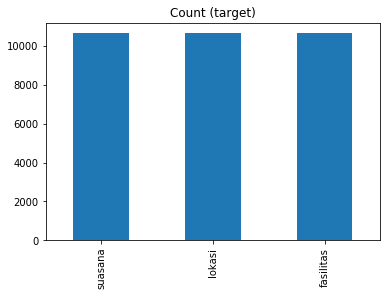

In [0]:
df_class_1_over_aspect = df_class_1_aspect.sample(count_class_0_aspect, replace=True)
df_class_2_over_aspect = df_class_2_aspect.sample(count_class_0_aspect, replace=True)
df_test_over_aspect = pd.concat([df_class_0_aspect, df_class_1_over_aspect, df_class_2_over_aspect], axis=0)

print('Random over-sampling:')
print(df_test_over_aspect.labeled_Stem_Neg.value_counts())

df_test_over_aspect.labeled_Stem_Neg.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
# to be imported
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, GRU
from keras.callbacks import EarlyStopping
from keras import initializers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
cols = ['labeled_Stem_Neg','Review_Stemming']
d_aspect = df_test_over_aspect[cols]

d_aspect=d_aspect[d_aspect['Review_Stemming'].notnull()]

d_aspect=d_aspect[d_aspect['labeled_Stem_Neg'].notnull()]
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.iloc[:, 1].values
y_aspect = d_aspect.iloc[:, 0].values

print(np.unique(y_aspect, return_counts=True))

(array(['fasilitas', 'lokasi', 'suasana'], dtype=object), array([10665, 10665, 10665]))


In [0]:
len(d_aspect)

31995

In [0]:
def tidak(str):
    tmp = ""
    for v in str:
        if v == "_":
            tmp = str
            return tmp
        else :
            tmp = ""
    return tmp

In [0]:
# from nltk.tag import CRFTagger
# ct = CRFTagger()
# ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [0]:
# def POS_TAG(str):
#     spl_aspect = [val.split() for val in [str]]
#     hasil_aspect = [ct.tag_sents([val]) for val in spl_aspect]
#     return hasil_aspect

In [0]:
# kal_aspect = d_aspect["Review_Stemming"]
# spl_aspect = [val.split() for val in kal_aspect]
# hasil_aspect = [ct.tag_sents([val]) for val in spl_aspect]
# hasil_aspect = [item for sublist in hasil_aspect for item in sublist]
# aspek = []
# for val in hasil_aspect:
#     tmp = ""
#     for vall in val:
#         if(vall[1] == "NNP" or vall[1] == "NN" or vall[1] == "VB"):
#             tmp = tmp + vall[0] + " "
#         tmp = tmp + tidak(vall[0]) + " "
#     tmp = tmp.split()
#     tmp = ' '.join(tmp)
#     aspek.append(tmp)

In [0]:
import pickle
with open('/content/drive/My Drive/PENDADARAN/aspect_.pkl', 'rb') as f:
    aspek = pickle.load(f)
d_aspect['aspek'] = aspek

In [0]:
d_aspect.replace('', np.nan, inplace=True)
d_aspect.dropna(inplace=True)

In [0]:
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.iloc[:, 1].values
y_aspect = d_aspect.iloc[:, 0].values

In [0]:
len(y_aspect)

31556

In [0]:
tk_aspect = Tokenizer()

In [0]:
text_aspect = d_aspect['Review_Stemming'].values
maxlen_aspect = max([len(i.split()) for i in text_aspect])

tk_aspect.fit_on_texts(text_aspect)
x_aspect = tk_aspect.texts_to_sequences(x_aspect)
x_aspect = sequence.pad_sequences(x_aspect, maxlen_aspect)
vocab_aspect = max([len(tk_aspect.word_index)]) + 1
print(x_aspect)

[[   0    0    0 ...   71   97  375]
 [   0    0    0 ...  129  241  192]
 [   0    0    0 ...   89   17  193]
 ...
 [   0    0    0 ...   49   34   55]
 [   0    0    0 ...  248 1126  115]
 [   0    0    0 ...    8   77  300]]


In [0]:
print("vocab aspect : " + str(vocab_aspect))
print("maxlen aspect: " + str(maxlen_aspect))

vocab aspect : 7341
maxlen aspect: 30


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y_aspect = LabelEncoder()
y_aspect = labelencoder_Y_aspect.fit_transform(y_aspect)
print(np.unique(y_aspect, return_counts=True))

(array([0, 1, 2]), array([10605, 10418, 10533]))


In [0]:
from tensorflow.keras import utils as np_utils
y_aspect = np_utils.to_categorical(y_aspect, num_classes= 3)

print(y_aspect)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split
x_train_aspect, x_test_aspect, y_train_aspect, y_test_aspect, indices_train_aspect, indices_test_aspect = train_test_split(x_aspect, y_aspect, d_aspect.index, test_size=0.33, random_state=42)

print(x_train_aspect.shape)
print(y_train_aspect.shape)
print(x_test_aspect.shape)
print(y_test_aspect.shape)
print(y_aspect)

(21142, 30)
(21142, 3)
(10414, 30)
(10414, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
x_train_aspect = sequence.pad_sequences(x_train_aspect, maxlen=maxlen_aspect)
x_test_aspect = sequence.pad_sequences(x_test_aspect, maxlen=maxlen_aspect)
print('x_train aspect shape:', x_train_aspect.shape)
print('x_test aspect shape:', x_test_aspect.shape)

x_train aspect shape: (21142, 30)
x_test aspect shape: (10414, 30)


In [0]:
embedding_dims = 64
filters = 200
kernel_size = 9
hidden_dims = 128
dropout = 0.5
lstm_unit = 64
gru_unit = 64

In [0]:
model_aspect = Sequential()
model_aspect.add(Embedding(vocab_aspect,
                embedding_dims,
                input_length=maxlen_aspect))
model_aspect.add(Dropout(dropout))

model_aspect.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1))

model_aspect.add(GlobalMaxPooling1D())
model_aspect.add(Dense(hidden_dims))
model_aspect.add(Dropout(dropout))
model_aspect.add(Activation('relu'))
    
model_aspect.add(Dense(3))
model_aspect.add(Activation('softmax'))

ctk = model_aspect
    
model_aspect.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_aspect = model_aspect.fit(x_train_aspect, y_train_aspect,
          batch_size=64,
          epochs=50,
          validation_split = 0.33,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14165 samples, validate on 6977 samples
Epoch 1/50





14165/14165 [==============================] - 12s 854us/step - loss: 0.5589 - acc: 0.7431 - val_loss: 0.1545 - val_acc: 0.9408
Epoch 2/50
14165/14165 [==============================] - 11s 781us/step - loss: 0.1680 - acc: 0.9365 - val_loss: 0.1250 - val_acc: 0.9517
Epoch 3/50
14165/14165 [==============================] - 11s 780us/step - loss: 0.1139 - acc: 0.9576 - val_loss: 0.1086 - val_acc: 0.9569
Epoch 4/50
14165/14165 [==============================] - 11s 776us/step - loss: 0.0928 - acc: 0.9677 - val_loss: 0.1114 - val_acc: 0.9574
Epoch 5/50
14165/14165 [==============================] - 11s 780us/step - loss: 0.0795 - acc: 0.9715 - val_loss: 0.1100 - val_acc: 0.9586
Epoch 6/50
14165/14165 [=========

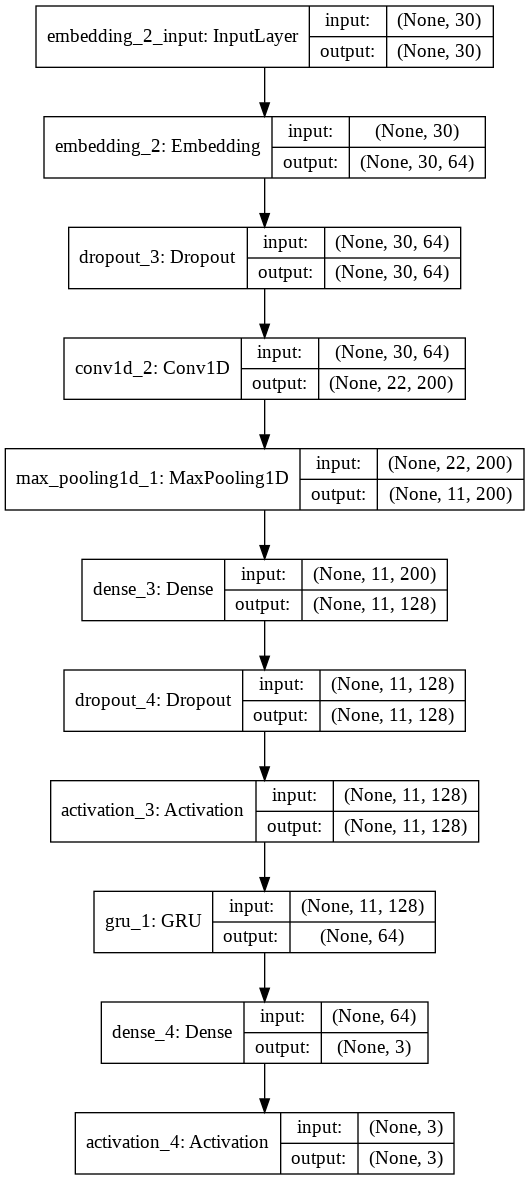

In [0]:
from keras.utils.vis_utils import plot_model

plot_model(ctk, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Predict Aspect

In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(list):
    tmp = []
    for val in list:
        katadasar = stemmer.stem(val)
        tmp.append(katadasar)
    return tmp

In [0]:
def ABSA_aspect(list):
    rsl = []
    spl_aspect = [val.split() for val in stem(list)]
    hasil_aspect = [ct.tag_sents([val]) for val in spl_aspect]
    hasil_aspect = [item for sublist in hasil_aspect for item in sublist]
    for val in hasil_aspect:
        tmp = ""
        for vall in val:
            if(vall[1] == "NNP" or vall[1] == "NN" or vall[1] == "VB"):
                tmp = tmp + vall[0] + " "
        tmp = tmp.split()
        tmp = ' '.join(tmp)
        k = tk_aspect.texts_to_sequences([tmp])
        k = sequence.pad_sequences(k, maxlen=maxlen_aspect)
        hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict_classes(k)])
        rsl.append(hsl)
    return rsl

In [0]:
kal_aspect = ["sangat indah dengan menikmati pemandangan yang disuguhkan", 
       "sangat asri dan sejuk", 
       "kendaraan menuju lokasi mudah ada dari semua arah", 
       "mereka menyediakan sewa payung"]

print(ABSA_aspect(kal_aspect))

[array(['suasana'], dtype=object), array(['suasana'], dtype=object), array(['lokasi'], dtype=object), array(['fasilitas'], dtype=object)]


C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

# Evaluate Aspect

In [0]:
new_review_category_aspect = model_aspect.predict_classes(x_test_aspect)

In [0]:
decode_aspect = np.argmax(y_test_aspect, axis=1)

In [0]:
decode_aspect

array([1, 1, 0, ..., 1, 0, 1])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
lab_aspect = ["fasilitas", "lokasi", "suasana"]

In [0]:
def conf_matrix(Y_act, Y_pred, lab):
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

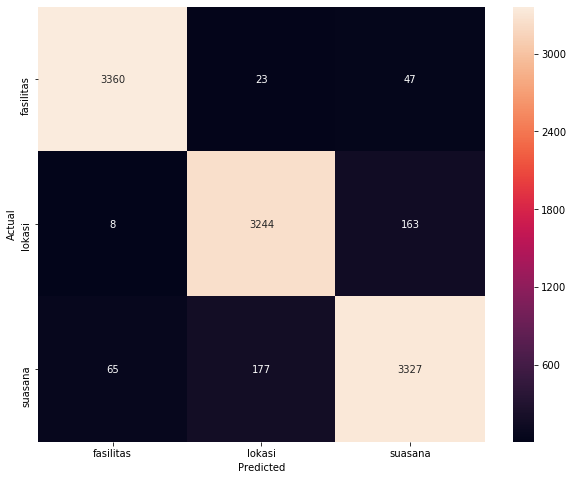

In [0]:
conf_matrix(new_review_category_aspect, decode_aspect, lab_aspect)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_aspect, decode_aspect)

0.948434799308623

In [0]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_aspect, decode_aspect))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3462
           1       0.93      0.96      0.94      3337
           2       0.94      0.92      0.93      3615

    accuracy                           0.95     10414
   macro avg       0.95      0.95      0.95     10414
weighted avg       0.95      0.95      0.95     10414



In [0]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_aspect, decode_aspect))
print('F1 score:', f1_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Recall:', recall_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Precision:', precision_score(new_review_category_aspect, decode_aspect, average='macro'))

Accuracy: 0.9493950451315537
F1 score: 0.9496383316655849
Recall: 0.9509142295169623
Precision: 0.9493699481540915


In [0]:
accr_aspect = model_aspect.evaluate(x_test_aspect,y_test_aspect)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_aspect[0],accr_aspect[1]))

10414/10414 [==============================] - 2s 156us/step
Test set
  Loss: 0.186
  Accuracy: 0.949


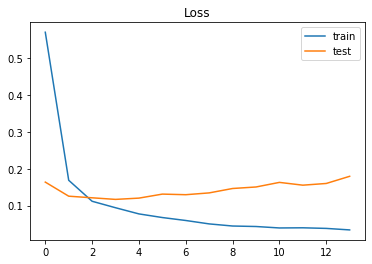

In [0]:
plt.title('Loss')
plt.plot(history_aspect.history['loss'], label='train')
plt.plot(history_aspect.history['val_loss'], label='test')
plt.legend()
plt.show();

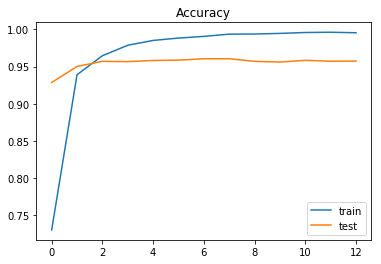

In [0]:
plt.title('Accuracy')
plt.plot(history_aspect.history['acc'], label='train')
plt.plot(history_aspect.history['val_acc'], label='test')
plt.legend()
plt.show();

# Sentiment

Class 0: 36927
Class 1: 6042


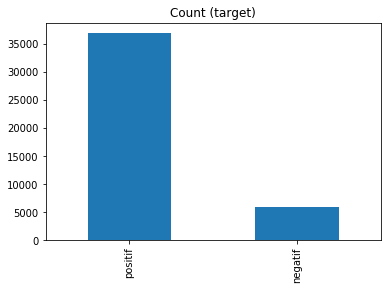

In [0]:
target_count_sent = df_train.labeled_Stop_Neg.value_counts()
print('Class 0:', target_count_sent["positif"])
print('Class 1:', target_count_sent["negatif"])

target_count_sent.plot(kind='bar', title='Count (target)');

In [0]:
#  net             pos            neg
count_class_0_sent, count_class_1_sent = df_train.labeled_Stop_Neg.value_counts()

# Divide by class
df_class_0_sent = df_train[df_train['labeled_Stop_Neg'] == "positif"]
df_class_1_sent = df_train[df_train['labeled_Stop_Neg'] == "negatif"]

Random over-sampling:
positif    36927
negatif    36927
Name: labeled_Stop_Neg, dtype: int64


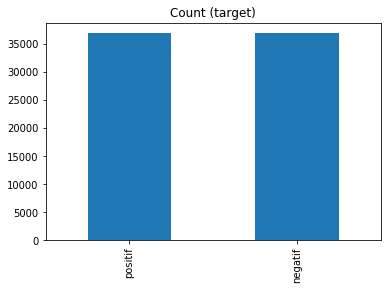

In [0]:
df_class_1_over_sent = df_class_1_sent.sample(count_class_0_sent, replace=True)
df_test_over_sent = pd.concat([df_class_0_sent, df_class_1_over_sent], axis=0)

print('Random over-sampling:')
print(df_test_over_sent.labeled_Stop_Neg.value_counts())

df_test_over_sent.labeled_Stop_Neg.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
cols_sent = ['labeled_Stop_Neg','Review_Stopwords_Joined']
d_sent = df_test_over_sent[cols_sent]
d_sent = d_sent[d_sent['Review_Stopwords_Joined'].notnull()]

d_sent = d_sent[d_sent['labeled_Stop_Neg'].notnull()]

In [0]:
len(d_sent)

73854

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [0]:
# def negasi(str):
#     tmp = ""
#     for v in str:
#         if v == "_":
#             tmp = str
#             return tmp
#         else :
#             tmp = ""
#     return tmp

In [0]:
# kal_sent = d_sent["Review_Stopwords_Joined"]
# spl_sent = [val.split() for val in kal_sent]
# hasil_sent = [ct.tag_sents([val]) for val in spl_sent]
# hasil_sent = [item for sublist in hasil_sent for item in sublist]
# sentimen = []
# for val in hasil_sent:
#     tmp = ""
#     for vall in val:
#         if(vall[1] == "NEG" or vall[1] == "JJ" or vall[1] == "VB"):
#             tmp = tmp + vall[0] + " "
#         tmp = tmp + negasi(vall[0]) + " "
#     tmp = tmp.split()
#     tmp = ' '.join(tmp)
#     sentimen.append(tmp)

In [0]:
# len(sentimen)

In [0]:
import pickle
with open('/content/drive/My Drive/PENDADARAN/sent_tanpa neg.pkl', 'rb') as f:
    sentimen = pickle.load(f)
d_sent['sentimen'] = sentimen

In [0]:
d_sent.replace('', np.nan, inplace=True)
d_sent.dropna(inplace=True)

In [0]:
d_sent.reset_index(drop=True,inplace=True)
x_sent = d_sent.iloc[:, 1].values
y_sent = d_sent.iloc[:, 0].values

In [0]:
x_sent = d_sent
x_sent = d_sent['sentimen']

In [0]:
tk_sent = Tokenizer()

In [0]:
text_sent = d_sent['Review_Stopwords_Joined'].values
maxlen_sent = max([len(i.split()) for i in text_sent])
tk_sent.fit_on_texts(text_sent) # each word in text is given a unique integer number
x_sent = tk_sent.texts_to_sequences(x_sent) # represent a completely new set of word sequence
x_sent = sequence.pad_sequences(x_sent, maxlen_sent) # to ensure that all sequences in a list have the same length
vocab_sent = max([len(tk_sent.word_index)]) + 1
print(x_sent)

[[   0    0    0 ... 2199   36  264]
 [   0    0    0 ...    0  166  193]
 [   0    0    0 ...   87    8  843]
 ...
 [   0    0    0 ...    0 1091  194]
 [   0    0    0 ...  389    2 4433]
 [   0    0    0 ...    0    0  209]]


In [0]:
print("vocab sentiment : " + str(vocab_sent))
print("maxlen sentiment : " + str(maxlen_sent))

vocab sentiment : 16652
maxlen sentiment : 27


In [0]:
from sklearn.preprocessing import LabelEncoder
# encoding the levels of categorical features into numeric values
labelencoder_Y_sent = LabelEncoder()
y_sent = labelencoder_Y_sent.fit_transform(y_sent)
print(y_sent)
print(np.unique(y_sent, return_counts=True))

[1 1 1 ... 0 0 0]
(array([0, 1]), array([31524, 32555]))


In [0]:
from tensorflow.keras import utils as np_utils
y_sent = np_utils.to_categorical(y_sent, num_classes= 2)
# One hot encoded
print(y_sent)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [0]:
test_split = 0.33
from sklearn.model_selection import train_test_split
x_train_sent, x_test_sent, y_train_sent, y_test_sent, indices_train_sent, indices_test_sent = train_test_split(x_sent, y_sent, d_sent.index, test_size=0.33, random_state=42)

print(x_train_sent.shape)
print(y_train_sent.shape)
print(x_test_sent.shape)
print(y_test_sent.shape)
print(y_sent)

(42932, 27)
(42932, 2)
(21147, 27)
(21147, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [0]:
x_train_sent = sequence.pad_sequences(x_train_sent, maxlen=maxlen_sent)
x_test_sent = sequence.pad_sequences(x_test_sent, maxlen=maxlen_sent)
print('x_train_sent shape:', x_train_sent.shape)
print('x_test_sent shape:', x_test_sent.shape)

x_train_sent shape: (42932, 27)
x_test_sent shape: (21147, 27)


In [0]:
embedding_dims = 64
filters = 200
kernel_size = 9
hidden_dims = 128
dropout = 0.25
lstm_unit = 64
gru_unit = 64

In [0]:
model_sent = Sequential()

model_sent.add(Embedding(vocab_sent,
               embedding_dims,
               input_length=maxlen_sent))
model_sent.add(Dropout(dropout))
model_sent.add(Conv1D(filters,
               kernel_size,
               padding='valid',
               activation='relu',
               strides=1))
model_sent.add(GlobalMaxPooling1D())
    
model_sent.add(Dense(hidden_dims))
model_sent.add(Dropout(dropout))
model_sent.add(Activation('relu'))
    
model_sent.add(Dense(2))
model_sent.add(Activation('sigmoid'))
    
ctk = model_sent

model_sent.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])    

history_sent = model_sent.fit(x_train_sent, y_train_sent,
          batch_size=64,
          epochs=80,
          validation_split = 0.33,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 28764 samples, validate on 14168 samples
Epoch 1/80





28764/28764 [==============================] - 22s 758us/step - loss: 0.5440 - acc: 0.7090 - val_loss: 0.4706 - val_acc: 0.7716
Epoch 2/80
28764/28764 [==============================] - 20s 693us/step - loss: 0.4136 - acc: 0.8127 - val_loss: 0.4185 - val_acc: 0.8079
Epoch 3/80
28764/28764 [==============================] - 19s 667us/step - loss: 0.3450 - acc: 0.8465 - val_loss: 0.4022 - val_acc: 0.8192
Epoch 4/80
28764/28764 [==============================] - 19s 670us/step - loss: 0.3023 - acc: 0.8633 - val_loss: 0.4163 - val_acc: 0.8202
Epoch 5/80
28764/28764 [==============================] - 20s 701us/step - loss: 0.2755 - acc: 0.8751 - val_loss: 0.3890 - val_acc: 0.8352
Epoch 6/80
28764/28764 [========

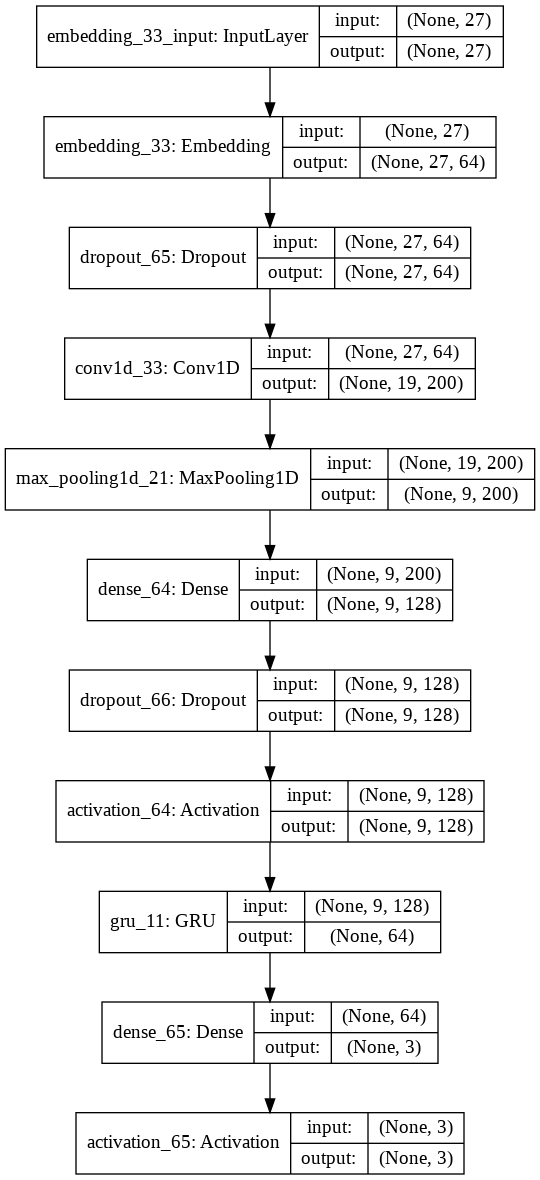

In [0]:
from keras.utils.vis_utils import plot_model

plot_model(ctk, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Predict Sentiment

In [0]:
stopword_list = ["pernah", "dan", "untuk", "yang", "dengan", "sangat", "banyak", "dari", 
            "kita", "saya", "juga", "bisa", "karena", "kalau", "tapi", "akan", "sudah", "kami", "adalah", 
            "anda", "lagi", "buat", "salah", "sampai", "dapat", "dalam", "lebih", "pada", "sekali", "atau", "masih", 
            "jika", "apa", "beberapa", "menjadi", "tetap", "saja", "terdapat", "boleh", "begitu", "hanya", "paling", 
            "sehingga", "jadi", "sambil", "harus", "memang", "setiap", "selalu", "berada", "kamu", "sebagai", "bagi", 
            "sana", "lain", "setelah", "semua", "seperti", "dulu", "dahulu", "ketika", "terlalu", "mungkin", "namun", 
            "hingga", "ada", "bila", "agak",  "tersebut", "sebuah", "selain", "sungguh", "bahkan", "tetapi", "apalagi", 
            "belum", "telah", "terus", "meskipun", "lalu", "sama", "agar", "pula", "secara", "selama", "tiap", "bagian", 
            "meski", "yaitu",  "serta", "seorang", "orang", "walaupun", "tertentu", "maka", "seolah", "cuma", "sang", 
            "alhamdulillah", "seakan", "bakal", "sekaligus", "kebanyakan", "sebelum", "senantiasa", "adanya", "saat",
            "itulah", "tadi", "terkait", "begitulah", "kira", "ke", "di", "nya", "antara", "ialah", "ya", "aja",
            "ini", "itu", "sih"]

In [0]:
def stopword(list):
    rsl = []
    for val in list:
        querywords = val.split()
        resultwords  = [word for word in querywords if word.lower() not in stopword_list]
        result = ' '.join(resultwords)
        rsl.append(result)
    return rsl

In [0]:
def join_negation(text):
    """  Join negation word with delimiter. """
    text_list = text.split(' ')

    for index in range(len(text_list)):
        if (text_list[index] == 'tidak' or text_list[index] == 'kurang' or text_list[index] == 'jangan'
           or text_list[index] == 'bukan'):
            if index < len(text_list) - 1:
                text_list[index] = text_list[index] + "_" + text_list[index + 1]
                text_list[index + 1] = ''
            else:
                text_list[index] = ''
    return ' '.join(' '.join(text_list).split())

In [0]:
def cleansentencesent(list):
    rsl = []
    tmp = stopword(list)
    for val in tmp:
        tmpp = join_negation(val)
        rsl.append(tmpp)
    return rsl

In [0]:
def ABSA_sent(list):
    rsl = []
    spl_sent = [val.split() for val in list]
    hasil_sent = [ct.tag_sents([val]) for val in spl_sent]
    hasil_sent = [item for sublist in hasil_sent for item in sublist]
    for val, ko in zip(hasil_sent, list):
        tmp = ""
        for vall in val:
            if(vall[1] == "NEG" or vall[1] == "JJ" or vall[1] == "VB"):
                tmp = tmp + vall[0] + " "
            if('_' in vall[0]):
                tmp = tmp + vall[0] + " "
        tmp = tmp.split()
        tmp = ' '.join(tmp)
        k = tk_sent.texts_to_sequences([tmp]) #represent a completely new set of word sequence
        k = sequence.pad_sequences(k, maxlen=maxlen_sent)
        hsl = labelencoder_Y_sent.inverse_transform([model_sent.predict_classes(k)])
        rsl.append(hsl)
    return rsl

In [0]:
kal_sent = ["Pemandangannya indah sekali, banyak berbagai macam pohon dan bunga", 
       "Tempatnya sangat teduh", 
       "sayangnya tempat ini ramai dan sesak ketika musim libur",
       "saya tidak suka dengan keramaian",
       "pantai fasilitasnya tidak memadai",
       "hawanya sedikit dingin dengan udara yang segar",
       "lokasi tidak terik",
       "Pas banget buat kamu yang suka akan nuansa alam, apalagi untuk botram bareng keluarga besar. Tempatnya sejuk ditambah ada rusa juga"]

print(ABSA_sent(cleansentencesent(kal_sent)))

[array(['positif'], dtype=object), array(['positif'], dtype=object), array(['negatif'], dtype=object), array(['negatif'], dtype=object), array(['negatif'], dtype=object), array(['positif'], dtype=object), array(['positif'], dtype=object), array(['positif'], dtype=object)]


# Evaluate Sentiment

In [0]:
new_review_category_sent = model_sent.predict_classes(x_test_sent)

In [0]:
decode_sent = np.argmax(y_test_sent, axis=1)

In [0]:
lab_sent = ["negatif","positif"]

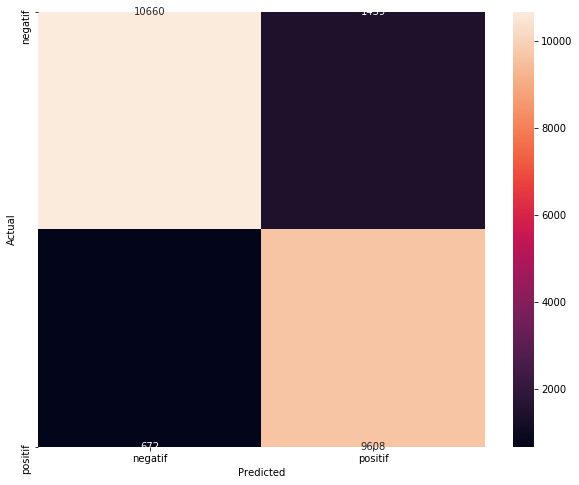

In [0]:
conf_matrix(new_review_category_sent, decode_sent, lab_sent)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_sent, decode_sent)

0.9056704946601725

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_sent, decode_sent)

0.9056704946601725

In [0]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_sent, decode_sent))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12099
           1       0.87      0.93      0.90     10280

    accuracy                           0.91     22379
   macro avg       0.91      0.91      0.91     22379
weighted avg       0.91      0.91      0.91     22379



In [0]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_sent, decode_sent))
print('F1 score:', f1_score(new_review_category_sent, decode_sent, average='macro'))
print('Recall:', recall_score(new_review_category_sent, decode_sent, average='macro'))
print('Precision:', precision_score(new_review_category_sent, decode_sent, average='macro'))

Accuracy: 0.9056704946601725
F1 score: 0.9054615850379715
Recall: 0.9078474504919369
Precision: 0.9052186481334398


In [0]:
accr_sent = model_sent.evaluate(x_test_sent,y_test_sent)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_sent[0],accr_sent[1]))

21147/21147 [==============================] - 3s 133us/step
Test set
  Loss: 0.457
  Accuracy: 0.847


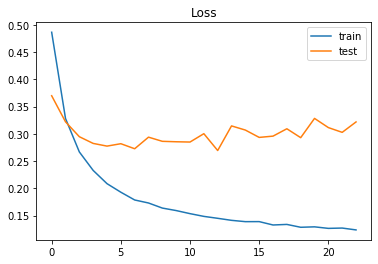

In [0]:
plt.title('Loss')
plt.plot(history_sent.history['loss'], label='train')
plt.plot(history_sent.history['val_loss'], label='test')
plt.legend()
plt.show();

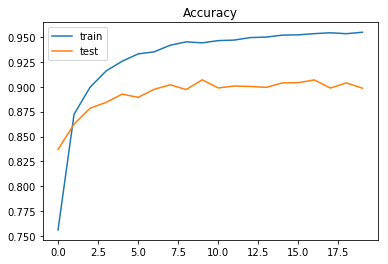

In [0]:
plt.title('Accuracy')
plt.plot(history_sent.history['acc'], label='train')
plt.plot(history_sent.history['val_acc'], label='test')
plt.legend()
plt.show();

# Aspect Based Sentiment Analysis

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
ABSA = ["Tempatnya sejuk.",
       "Segar, banyak berbagai macam pohon dan bunga.", 
       "Tempatnya sangat teduh.", 
       "Sayangnya tempat ini ramai dan sesak ketika musim libur.",
       "Fasilitasnya tidak memadai.",
       "Lokasi tidak panas dan tidak ramai",
       "Hawanya sedikit dingin dengan udara yang segar.",
       "Lokasi sama sekali tidak menarik.",
       "Pas banget buat kamu yang suka akan nuansa alam, apalagi untuk liburan bareng keluarga besar."]

sn = ABSA_sent(cleansentencesent(ABSA))
ap = ABSA_aspect(ABSA)
for val, sen, asp in zip(ABSA, sn, ap):
    print(val)
    print("Sentimen : " + sen)
    print("Aspek Kategori: " + asp)
    print()

Tempatnya sejuk.
['Sentimen : positif']
['Aspek Kategori: suasana']

Segar, banyak berbagai macam pohon dan bunga.
['Sentimen : positif']
['Aspek Kategori: lokasi']

Tempatnya sangat teduh.
['Sentimen : positif']
['Aspek Kategori: lokasi']

Sayangnya tempat ini ramai dan sesak ketika musim libur.
['Sentimen : negatif']
['Aspek Kategori: suasana']

Fasilitasnya tidak memadai.
['Sentimen : negatif']
['Aspek Kategori: fasilitas']

Lokasi tidak panas dan tidak ramai
['Sentimen : positif']
['Aspek Kategori: lokasi']

Hawanya sedikit dingin dengan udara yang segar.
['Sentimen : positif']
['Aspek Kategori: suasana']

Lokasi sama sekali tidak menarik.
['Sentimen : negatif']
['Aspek Kategori: lokasi']

Pas banget buat kamu yang suka akan nuansa alam, apalagi untuk liburan bareng keluarga besar.
['Sentimen : positif']
['Aspek Kategori: lokasi']



In [0]:
ABSA = ["lokasi tidak terlalu panas",
        "pantai kuta panas sekali"]

sn = ABSA_sent(cleansentencesent(ABSA))
ap = ABSA_aspect(ABSA)
for val, sen, asp in zip(ABSA, sn, ap):
    print(val)
    print("Sentimen : " + sen)
    print("Aspek Kategori: " + asp)
    print()

lokasi tidak terlalu panas
['Sentimen : positif']
['Aspek Kategori: lokasi']

pantai kuta panas sekali
['Sentimen : negatif']
['Aspek Kategori: lokasi']



In [0]:
ABSA = ["Penjualnya memaksa saya untuk membeli.",
        "disediakan tempat ibadah dan tidak begitu luas",
        "sayang, tidak diperbolehkan membawa makanan atau minuman dari luar",
        "kamar mandinya banyak dan cukup bersih"]

sn = ABSA_sent(cleansentencesent(ABSA))
ap = ABSA_aspect(ABSA)
for val, sen, asp in zip(ABSA, sn, ap):
    print(val)
    print("Sentimen : " + sen)
    print("Aspek Kategori: " + asp)
    print()

Penjualnya memaksa saya untuk membeli.
['Sentimen : negatif']
['Aspek Kategori: fasilitas']

disediakan tempat ibadah dan tidak begitu luas
['Sentimen : negatif']
['Aspek Kategori: fasilitas']

sayang, tidak diperbolehkan membawa makanan atau minuman dari luar
['Sentimen : negatif']
['Aspek Kategori: fasilitas']

kamar mandinya banyak dan cukup bersih
['Sentimen : positif']
['Aspek Kategori: lokasi']

